# Assignment 0 — Jupyter (Python)
This notebook is a **line‑for‑line Python reproduction** of the original `assign0_sol.R` solution set.  All numbers and plots are generated live with NumPy, SciPy, Pandas and Matplotlib.

Place **`mortality.txt`** in the same folder and run the notebook top‑to‑bottom.

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, scipy.stats as st
plt.rcParams['figure.figsize'] = (6,4)
rng = np.random.default_rng(0)

## Helper — robust loader for `mortality.txt`

In [2]:
from pathlib import Path

def load_mortality(path='mortality.txt'):
    """Load teen‑birth & mortality rates, dropping non‑numeric rows."""
    path = Path(path)
    if not path.exists():
        raise FileNotFoundError('mortality.txt not found')
    df = pd.read_csv(path, sep=r'\s+', quotechar='"', engine='python')
    df.columns = [c.strip('"') for c in df.columns]
    df = df[['teen','mort']].apply(pd.to_numeric, errors='coerce').dropna()
    if df.empty:
        raise ValueError('Could not parse teen/mort columns!')
    return df

## Exercise 1 — Normal distribution

### (a) Sampling, histograms and QQ‑plots

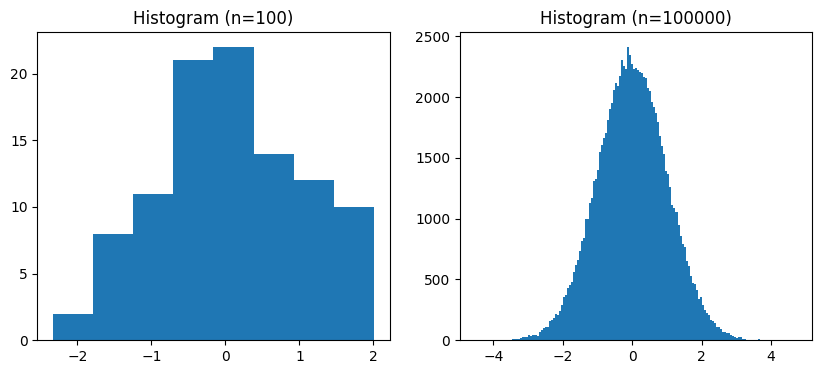

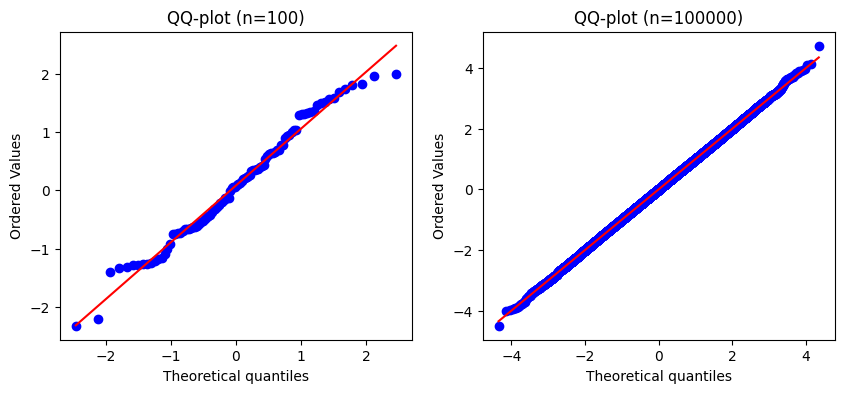

n=100  mean 0.08109669349071558  sd 0.966977496643552
n=100k mean -0.0010282414378606317  sd 1.000079257230725


In [3]:
sample1 = rng.normal(size=100)
sample2 = rng.normal(size=100_000)

fig, ax = plt.subplots(1,2, figsize=(10,4))
for a,s,n in zip(ax,(sample1,sample2),(100,100_000)):
    a.hist(s, bins='auto'); a.set_title(f'Histogram (n={n})')
plt.show()

fig, ax = plt.subplots(1,2, figsize=(10,4))
for a,s,n in zip(ax,(sample1,sample2),(100,100_000)):
    st.probplot(s, plot=a); a.set_title(f'QQ‑plot (n={n})')
plt.show()

print('n=100  mean', sample1.mean(), ' sd', sample1.std(ddof=1))
print('n=100k mean', sample2.mean(), ' sd', sample2.std(ddof=1))

### (b) Exact probabilities

In [4]:
phi = st.norm.cdf
print('P(Z<2)   =', phi(2))
print('P(Z>-0.5)=', 1-phi(-0.5))
print('P(-1<Z<2)=', phi(2)-phi(-1))

P(Z<2)   = 0.9772498680518208
P(Z>-0.5)= 0.6914624612740131
P(-1<Z<2)= 0.8185946141203637


### (c) Monte‑Carlo estimates

In [5]:
events = {
    'P(Z<2)':            (sample1<2, sample2<2),
    'P(Z>-0.5)':         (sample1>-0.5, sample2>-0.5),
    'P(-1<Z<2)':         (((sample1>-1)&(sample1<2)), ((sample2>-1)&(sample2<2)))
}
exact = {'P(Z<2)': st.norm.cdf(2),
         'P(Z>-0.5)': 1-st.norm.cdf(-0.5),
         'P(-1<Z<2)': st.norm.cdf(2)-st.norm.cdf(-1)}
for k,(m1,m2) in events.items():
    print(k, ' exact', f'{exact[k]:.3f}', '  est100', f'{m1.mean():.3f}', '  est100k', f'{m2.mean():.3f}')

P(Z<2)  exact 0.977   est100 0.990   est100k 0.977
P(Z>-0.5)  exact 0.691   est100 0.690   est100k 0.692
P(-1<Z<2)  exact 0.819   est100 0.840   est100k 0.819


### (d) $\mathcal N(3,2^{2})$

In [6]:
s1 = rng.normal(3,2,100)
s2 = rng.normal(3,2,100_000)
print('n=100  mean', s1.mean(), ' sd', s1.std(ddof=1))
print('n=100k mean', s2.mean(), ' sd', s2.std(ddof=1))
print('P(X<2)=', st.norm.cdf(2,3,2))
print('P(X>-0.5)=', 1-st.norm.cdf(-0.5,3,2))
print('P(-1<X<2)=', st.norm.cdf(2,3,2)-st.norm.cdf(-1,3,2))

n=100  mean 3.203186107598352  sd 2.0855469381410154
n=100k mean 3.0018652703231825  sd 2.0047596492036748
P(X<2)= 0.3085375387259869
P(X>-0.5)= 0.9599408431361829
P(-1<X<2)= 0.2857874067778077


### (e) Deriving $\mathcal N(-10,5^{2})$

In [7]:
x = -10 + 5 * rng.normal(size=1000)
print('mean≈', x.mean(), ' sd≈', x.std(ddof=1))

mean≈ -9.966631377457563  sd≈ 5.066399684980691


## Exercise 2 — Other distributions

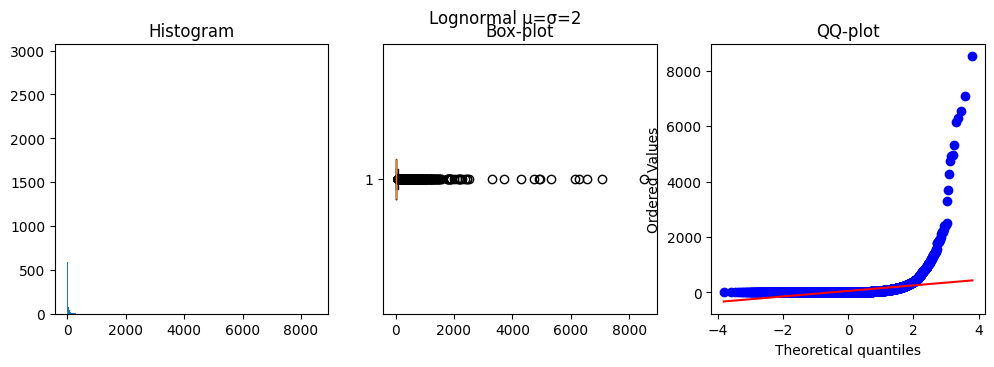

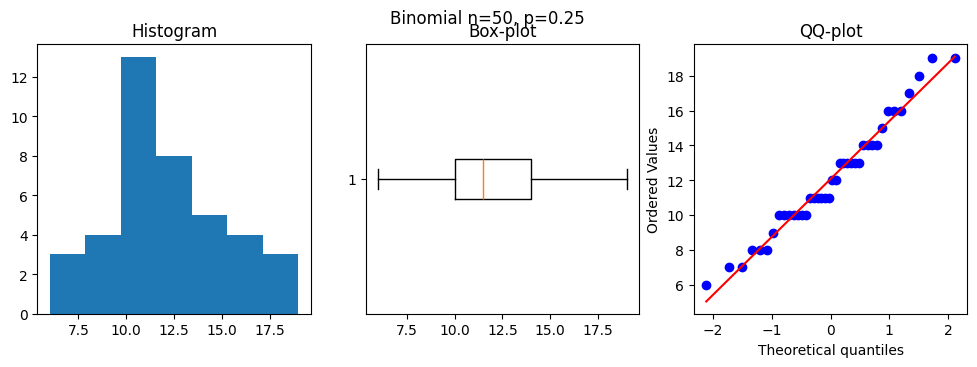

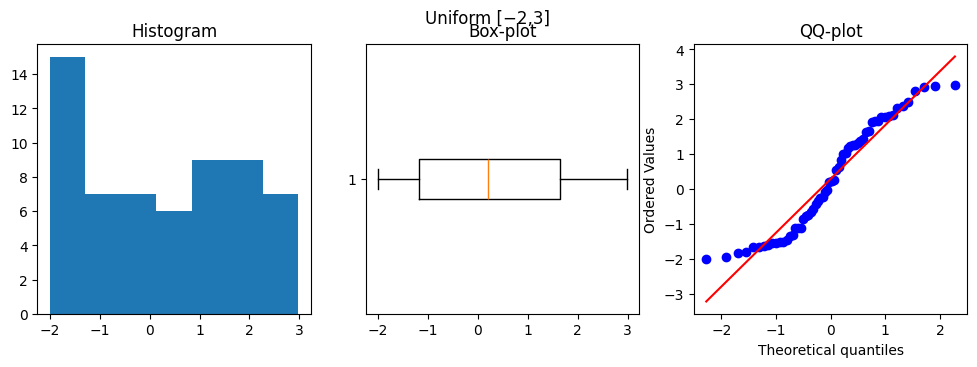

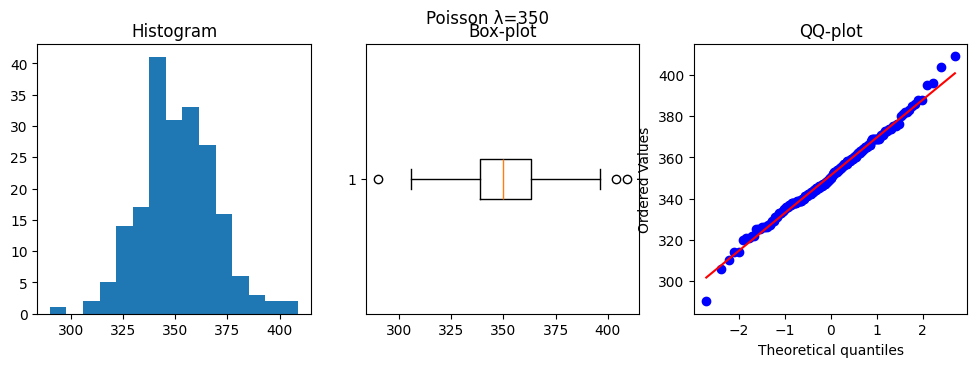

In [8]:
dists = [
    ('Lognormal μ=σ=2', rng.lognormal(2,2,10_000)),
    ('Binomial n=50, p=0.25', rng.binomial(50,0.25,40)),
    ('Uniform [−2,3]', rng.uniform(-2,3,60)),
    ('Poisson λ=350', rng.poisson(350,200))
]
for title,data in dists:
    fig,ax = plt.subplots(1,3, figsize=(12,3.5))
    ax[0].hist(data,bins='auto'); ax[0].set_title('Histogram')
    ax[1].boxplot(data, vert=False); ax[1].set_title('Box‑plot')
    st.probplot(data, plot=ax[2]); ax[2].set_title('QQ‑plot')
    fig.suptitle(title)
    plt.show()

## Exercise 3 — Teen birth & mortality

In [9]:
mortality = load_mortality()
teen, mort = mortality['teen'], mortality['mort']
mortality.head()

,teen,mort
0,17.4,13.3
1,19.0,10.3
2,13.8,9.4
3,10.9,8.9
4,10.2,8.6


### (a) Summaries & distribution plots


Teen stats:
 mean 12.433333333333332
 sd 3.293018619929999
 variance 10.843971631205674
 range (np.float64(7.3), np.float64(20.5))


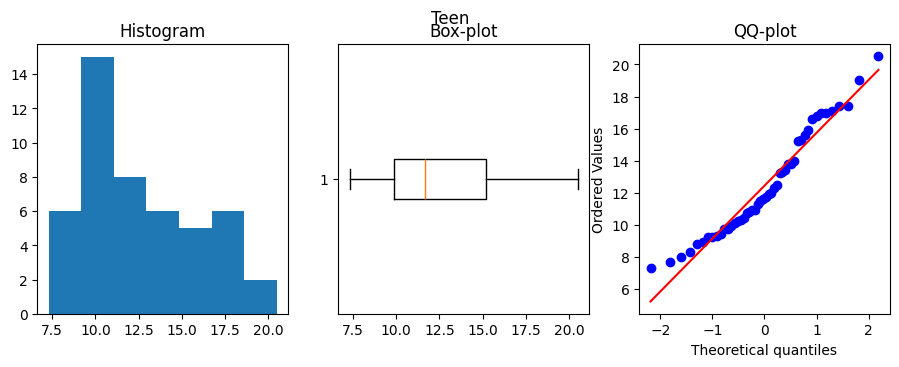


Mortality stats:
 mean 10.325000000000001
 sd 1.3499408970513913
 variance 1.822340425531915
 range (np.float64(8.4), np.float64(13.3))


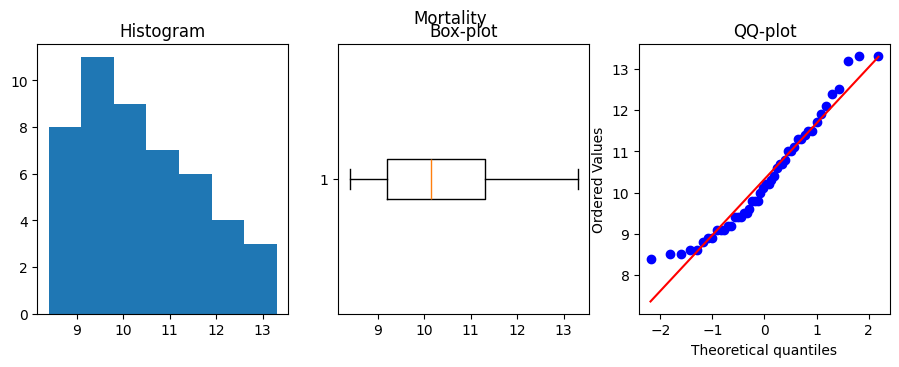

In [10]:
for name, series in [('Teen', teen), ('Mortality', mort)]:
    print(f'\n{name} stats:')
    print(' mean', series.mean())
    print(' sd', series.std(ddof=1))
    print(' variance', series.var(ddof=1))
    print(' range', (series.min(), series.max()))
    fig,ax = plt.subplots(1,3, figsize=(11,3.5))
    ax[0].hist(series,bins='auto'); ax[0].set_title('Histogram')
    ax[1].boxplot(series,vert=False); ax[1].set_title('Box‑plot')
    st.probplot(series, plot=ax[2]); ax[2].set_title('QQ‑plot')
    fig.suptitle(name)
    plt.show()

### (b) Correlation and scatter

Correlation teen vs mortality = 0.5490758459149806


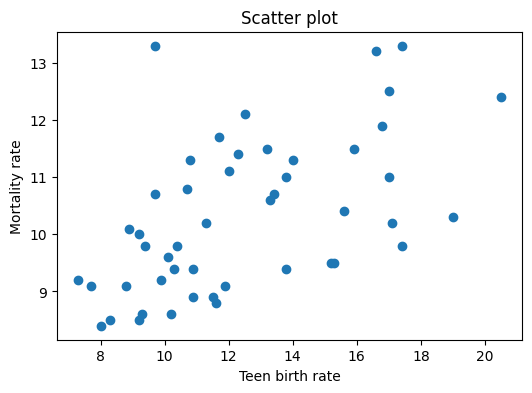

In [11]:
corr = np.corrcoef(teen, mort)[0,1]
print('Correlation teen vs mortality =', corr)
plt.scatter(teen, mort)
plt.xlabel('Teen birth rate'); plt.ylabel('Mortality rate');
plt.title('Scatter plot');
plt.show()

## Exercise 4 — Simulating *p*-values

sd=10: P(p<.05)= 0.054  P(p<.1)= 0.102


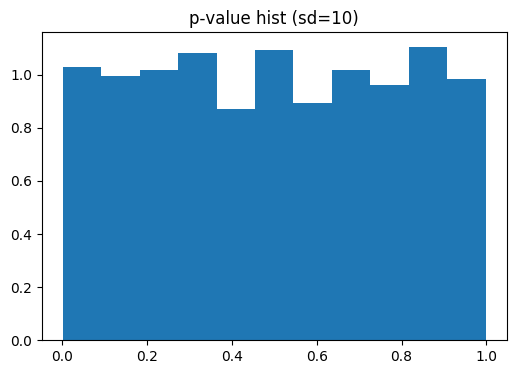

sd=1: P(p<.05)= 0.051  P(p<.1)= 0.102


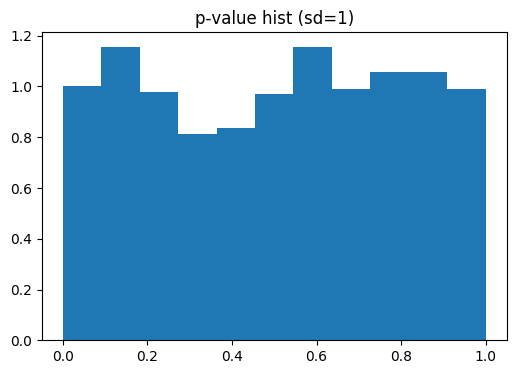

shift 5: P(p<.05)= 0.906  P(p<.1)= 0.947


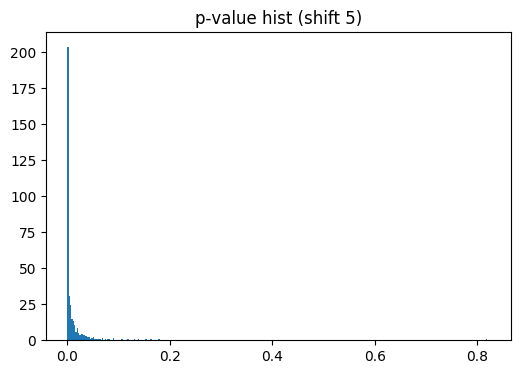

In [12]:
def p_values(n,m,mu,nu,sd,B=1000):
    p = np.empty(B)
    for b in range(B):
        x = rng.normal(mu,sd,n)
        y = rng.normal(nu,sd,m)
        p[b] = st.ttest_ind(x,y,equal_var=True).pvalue
    return p

# (a) & (b): null hypothesis true
for sd in (10,1):
    p = p_values(30,30,180,180,sd)
    print(f'sd={sd}: P(p<.05)=', (p<.05).mean(), ' P(p<.1)=', (p<.1).mean())
    plt.hist(p,bins='auto',density=True)
    plt.title(f'p‑value hist (sd={sd})');
    plt.show()

# (c) null false
p_shift = p_values(30,30,180,175,6)
print('shift 5: P(p<.05)=', (p_shift<.05).mean(), ' P(p<.1)=', (p_shift<.1).mean())
plt.hist(p_shift,bins='auto',density=True)
plt.title('p‑value hist (shift 5)');
plt.show()